# Análise de ações MGLU3.SA do mercado financeiro

## Objetivo

O presente notebook tem como finalidade relacionar os dados das ações MGLU3.SA com a linha do tempo do Magazine Luiza, com intuito de destacar decisões tomadas e como isso impactou o mercado dessas ações.

A linha do tempo do Magazine Luiza está disponível em: \
https://ri.magazineluiza.com.br/ShowCanal/Nossa-Historia?=maMhsoEQNCOr/Wxrb98OXA==

## Importação das bibliotecas

In [1]:
# Biblioteca para aquisição dos dados das ações
import yfinance          as yf

# Biblioteca para manipulação dos dados
import pandas            as pd

# Bibliotecas para plotagem
import matplotlib.pyplot as plt
import seaborn           as sns

## Sobre o dataset

In [2]:
mglu3 = yf.download('MGLU3.SA')

mglu3.info()

[*********************100%***********************]  1 of 1 completed
<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2590 entries, 2011-05-02 to 2021-10-18
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Open       2590 non-null   float64
 1   High       2590 non-null   float64
 2   Low        2590 non-null   float64
 3   Close      2590 non-null   float64
 4   Adj Close  2590 non-null   float64
 5   Volume     2590 non-null   int64  
dtypes: float64(5), int64(1)
memory usage: 141.6 KB


* __Open__ - Preço que uma ação começou a ser negociada
* __High__ - Preço máximo da ação em determinado período de tempo
* __Low__  - Preço mínimo da ação em determinado período de tempo
* __Close__ - Preço que uma ação terminou de ser negociada
* __Adj Close__ - Preço de fechamento ajustado
* __Volume__ - Número de ações negociadas

Além de conter como **index** a data em que os itens citados anteriormente ocorreram (logo, trata-se de séries temporais).




## Análise dos dados

In [3]:
mglu3

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2011-05-02,0.503125,0.518750,0.503125,0.514062,0.463173,280003200
2011-05-03,0.515625,0.521562,0.506250,0.509375,0.458950,33670400
2011-05-04,0.510000,0.515000,0.510000,0.515000,0.464018,39203200
2011-05-05,0.512812,0.512812,0.510000,0.511875,0.461202,35097600
2011-05-06,0.510937,0.511875,0.500000,0.508125,0.457824,38672000
...,...,...,...,...,...,...
2021-10-11,15.040000,15.060000,14.350000,14.380000,14.380000,30124900
2021-10-13,14.420000,14.650000,14.290000,14.500000,14.500000,29912600
2021-10-14,14.600000,14.630000,14.100000,14.170000,14.170000,26031600


In [4]:
mglu3.describe()

,Open,High,Low,Close,Adj Close,Volume
count,2590.000000,2590.000000,2590.000000,2590.000000,2590.000000,2.590000e+03
mean,4.675306,4.764570,4.576654,4.670803,4.608114,3.625027e+07
std,7.346219,7.479969,7.196430,7.337112,7.317673,3.028812e+07
min,0.031445,0.031757,0.030390,0.030585,0.029192,0.000000e+00
25%,0.252500,0.257265,0.246640,0.251328,0.230461,1.799928e+07
50%,0.404687,0.412187,0.397304,0.405937,0.370237,2.930560e+07
75%,5.467969,5.557265,5.389531,5.468750,5.313227,4.479600e+07
max,28.150000,28.309999,26.740000,27.450001,27.401571,4.304640e+08


In [ ]:
sns.set_theme()

Para analisar o preço das ações será criada uma _pandas series_ que irá conter a média entre os preços **Open** e **Close** com sua respectiva data como **index**.

In [65]:
avg_price = pd.Series((mglu3['Open'] + mglu3['Close']) / 2, index=mglu3.index)

avg_price.head()

Date
2011-05-02    0.508593
2011-05-03    0.512500
2011-05-04    0.512500
2011-05-05    0.512343
2011-05-06    0.509531
dtype: float64

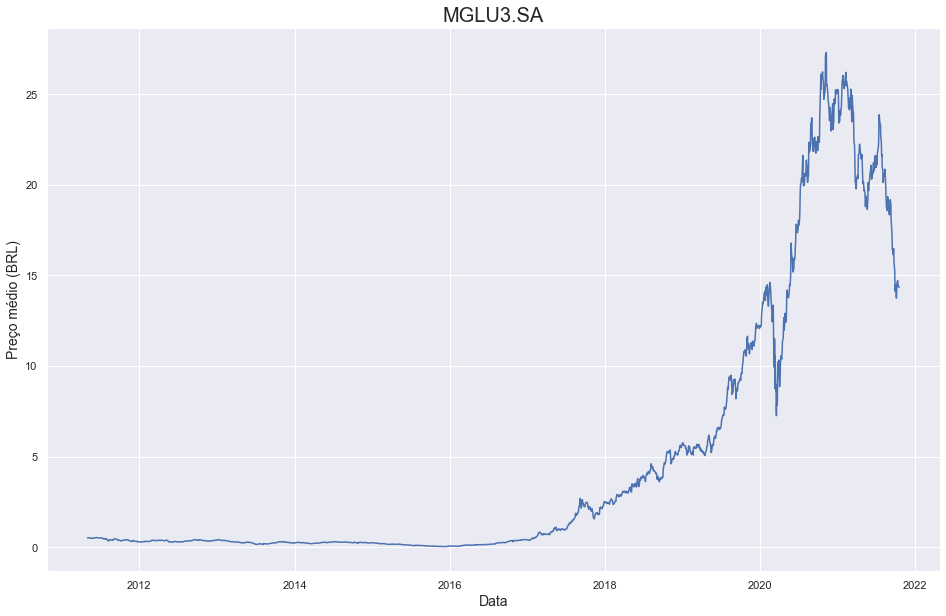

In [84]:
plt.figure(figsize=(16, 10))

sns.lineplot(data=avg_price, x=avg_price.index, y=avg_price.values)

plt.title('MGLU3.SA', fontsize=20)
plt.ylabel('Preço médio (BRL)', fontsize=14)
plt.xlabel('Data', fontsize=14)
plt.show()

Para evitar várias repetiçoes de trechos semelhantes de código, criarei uma função responsável por fazer o plot de todos os anos e de um trecho em <ins>**laranja**</ins> representando um ano em específico.

A função receberá dois parâmetros que irão limitar o plot <ins>**laranja**</ins> em um trecho de datas desejável.

In [74]:
def year_plot(start, end):
    plt.figure(figsize=(16, 10))

    sns.lineplot(data=avg_price, x=avg_price.index, y=avg_price.values)

    sns.lineplot(data=avg_price.loc[start:end], 
                 x=avg_price.loc[start:end].index,
                 y=avg_price.loc[start:end].values)

    plt.title('MGLU3.SA', fontsize=20)
    plt.ylabel('Preço médio (BRL)', fontsize=14)
    plt.xlabel('Data', fontsize=14)
    plt.show()

### 2011
* Ano da Oferta Pública Inicial de Ações (IPO), quando a Companhia passa a ser listada na BM&FBovespa. 
* A empresa adquire a rede Baú da Felicidade.

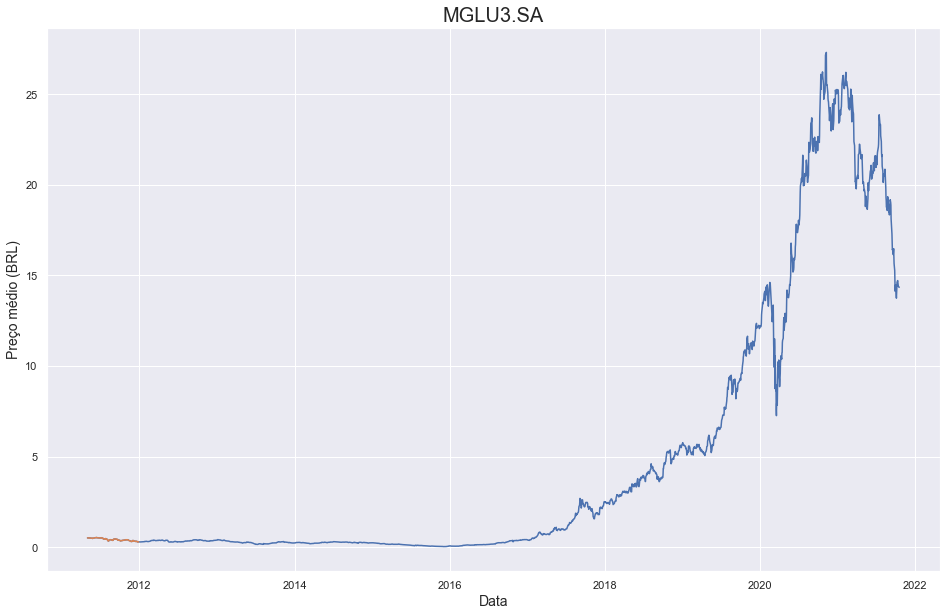

In [75]:
year_plot('2011-05-02', '2011-12-31')

### 2016
* O Magazine Luiza é a empresa de capital aberto que mais se valorizou  no mundo. 
* Todos os vendedores atendem utilizando um smartphone, pelo aplicativo do Mobile Vendas. 
* Lançamento da plataforma de Marketplace, cerca de 50 parceiros passam a vender seus produtos dentro do site do Magazine Luiza.

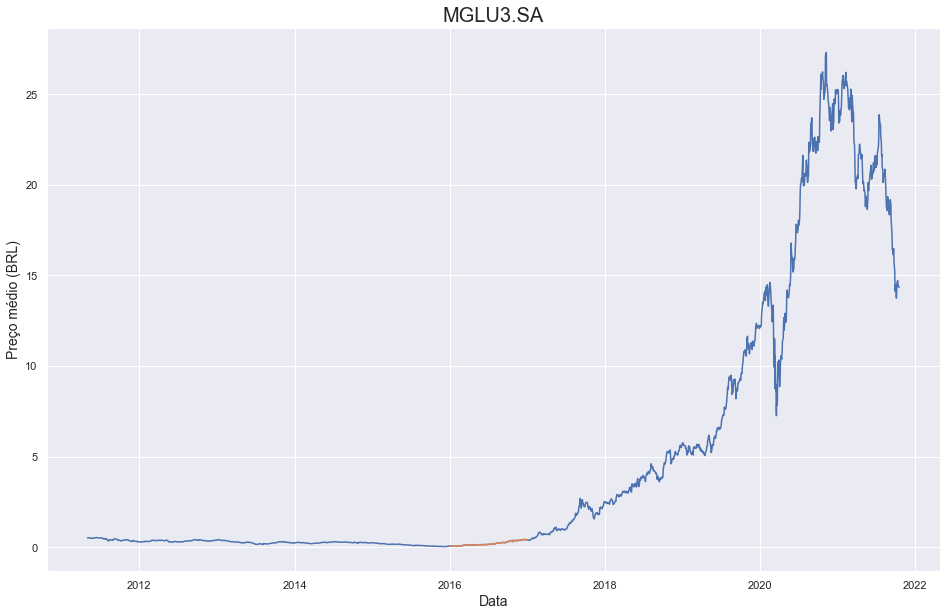

In [76]:
year_plot('2016-01-01', '2016-12-31')

### 2017
* Magazine Luiza lidera o ranking da Bovespa por mais um ano. 
* Empresa faz oferta de ações e arrecada R$ 1,8 bilhão. 
* Frederico Trajano é apontado como empreendedor do ano pela IstoÉ Dinheiro. 
* Reality show do Magazine Luiza, o Missão Digital, estreia na Rede Globo. 
* Empresa cria canal de denúncia interno. 
* Magazine Luiza adquire a IntegraCommerce e o laboratório de inovação do Magazine Luiza chega a mais de 450 engenheiros e especialistas que trabalham para tornar as operações do Magazine Luiza cada vez mais digitais. 

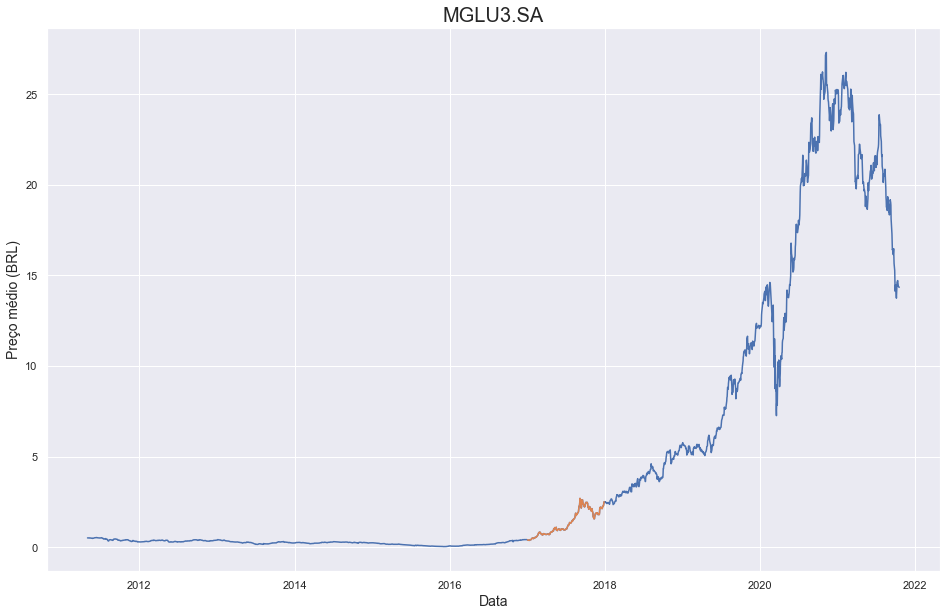

In [77]:
year_plot('2017-01-01', '2017-12-31')

### 2018
* Magazine Luiza vira Magalu. 
* Empresa adquire a startup de logística Logbee. 
* Campanha do 7 x 1 é dos destaques do marketing brasileiro e Magalu é a empresa que mais vende televisores para brasileiros assistirem à Copa do Mundo. 
* Campanha do "Eu Meto a Colher, sim" é lançada. 
* Empresa é apontada como uma das mais inovadoras do Brasil pela revista americana Fast Company. 
* O app do Magalu é um dos mais bem-sucedidos apps de compras do Brasil, com 26 milhões de downloads e uma participação de cerca de 40% dos pedidos online da companhia. 

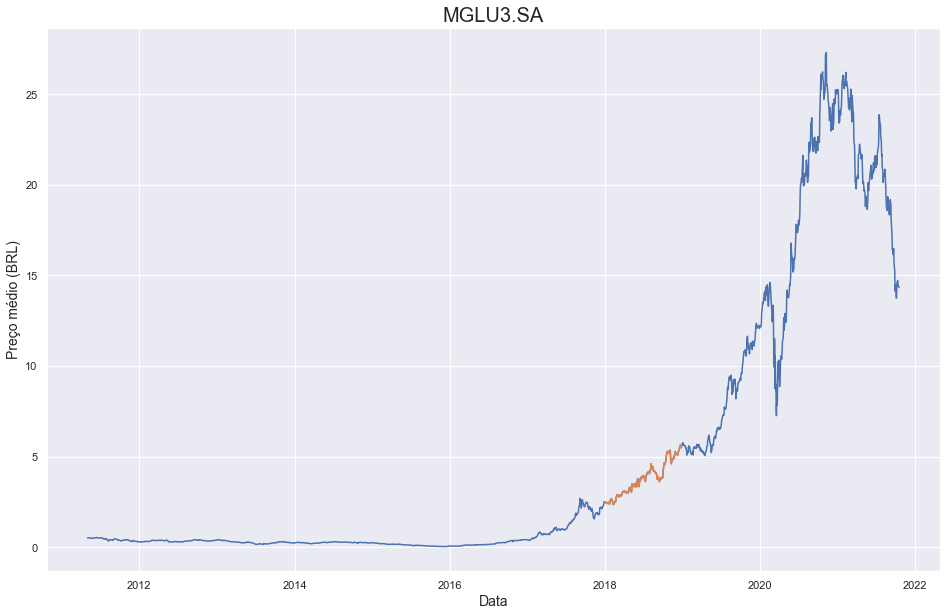

In [78]:
year_plot('2018-01-01', '2018-12-31')

### 2019
* Magalu adquire a Netshoes, maior e-commerce esportivo do Brasil, e, no mundo físico, inaugura sua milésima loja. 
* Empresa faz oferta de ações e arrecada mais de R$ 4 bilhões de reais. 
* Na Black Friday, protagoniza um show ao vivo na tevê, a "Black das Blacks". 
* Sua marca vira uma das trinta mais valiosas do País. 
* Primeiro Expo Magalu, evento para sellers, reúne milhares de pessoas em São Paulo. 
* Empresa entra no Pará. 
* Frederico Trajano é apontado como executivo do ano pelo Valor Econômico.

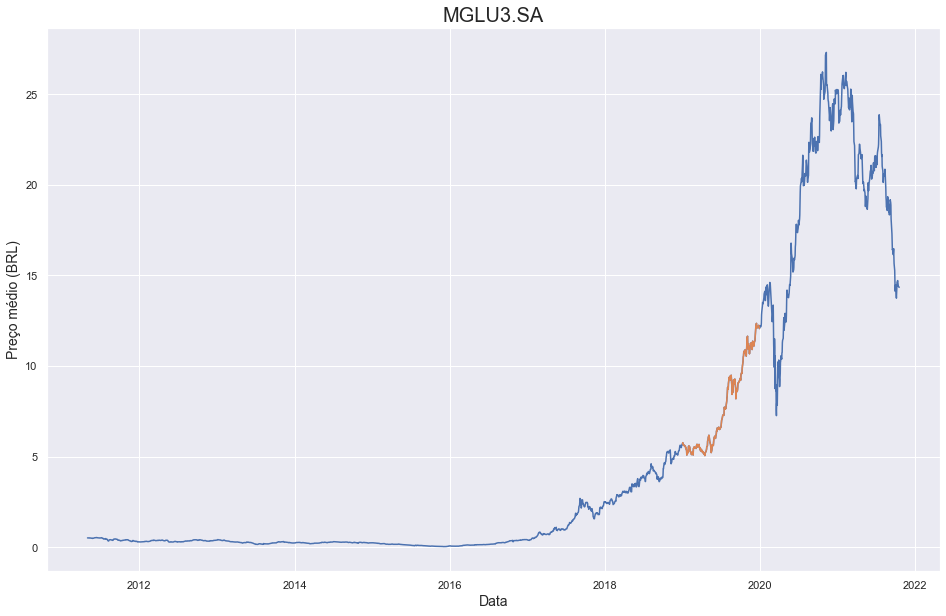

In [79]:
year_plot('2019-01-01', '2019-12-31')

### 2020
* Magalu iniciou o ano com a aquisição do marketplace de livros Estante Virtual. 
* Frente as limitações de isolamento impostas pelo combate à disseminação da covid-19, a empresa acelerou seu processo de desenvolvimento e implementação do Parceiro Magalu. 
* MagaluPay foi lançado como nova funcionalidade do superaplicativo da companhia.

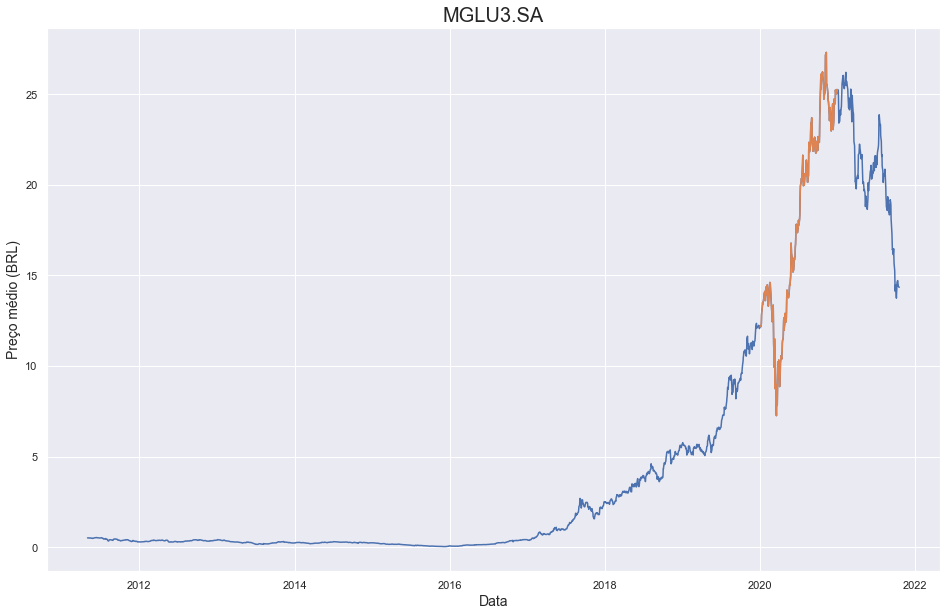

In [80]:
year_plot('2020-01-01', '2020-12-31')

O lançamento da plataforma digital Parceiro Magalu ocorreu no dia 31 de março. \
Fonte: https://canaltech.com.br/e-commerce/magazine-luiza-cria-programa-para-pequenas-empresas-e-autonomos-venderem-de-casa-162705/

Esse lançamento pode ter sido a causa da volta do crescimento no valor das ações MGLU3.SA. Se plotarmos o destaque (laranja) do ano de 2020 a partir de 31 de março, fica evidente que por volta dessa data iniciou-se um processo de crescimento no valor das ações MGLU3.SA.

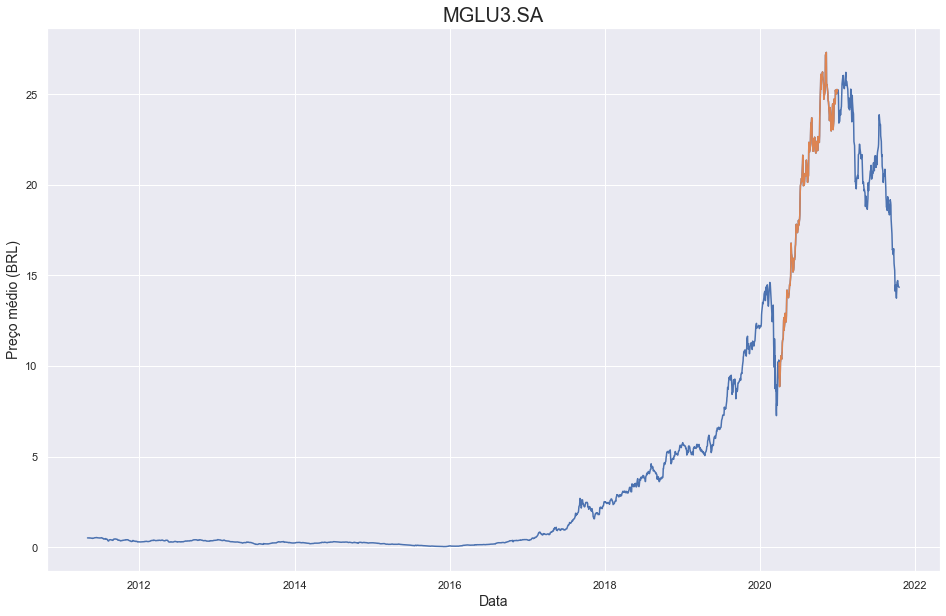

In [83]:
year_plot('2020-03-31', '2020-12-31')

## Conclusão

Segundo o mesmo site onde está presente a linha do tempo do Magazine Luiza, em 2015 houve uma Transformação Digital. Fica evidente, assim, a importância do uso de tecnologias em empresas já que é possível perceber que a partir desse ano cresceram bastante se comparado com os anos anteriores.

Ainda vale salientar que as decisões tomadas na empresa tiveram impacto nos preços das ações como foi possível observar nas plotagens dos gráficos, com destaque para a criação do Parceiro Magalu, em 2020, que, no contexto de uma pandemia, auxiliou diversos vendedores, possibilitando que lojas físicas fechadas pudessem voltar a vender além de garantir uma renda extra para autônomos.